# Tugas Akhir: Prediksi Model

__Prediksi Rate Of Penetration Pada Sumur Pemboran Pertamina Menggunakan Jaringan Saraf Tiruan Propagasi Balik__

Author: anisagmla@gmail.com

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
os.chdir('C:/Users/Anisa Gemelia/Documents/Dokumen Kuliah/Tugas Akhir/Output')
os.getcwd()

'C:\\Users\\Anisa Gemelia\\Documents\\Dokumen Kuliah\\Tugas Akhir\\Output'

## Predict from Model

In [3]:
#upload data ke csv
df = pd.read_csv('data_clean_1225.csv')

In [4]:
from keras.models import load_model
model = load_model('model_ann_2layers.h5')

In [5]:
df_clean = df[(df['TYPE_WELL'] == 1)]
df_clean

,TYPE_WELL,BIT_SIZE,MDEPTH_(M),MTVD_(M),WOB_(Ton),HKLD_(Ton),RPM,SCFM,MFI_(GPM),SPP_(Psi),MWI__(sg),ROP1_(min/M)
0,1,12.25,1299,1124,7,55,40,0,773,1152,1,15.0
1,1,12.25,1300,1125,8,54,55,0,768,1152,1,12.2
2,1,12.25,1301,1125,7,55,55,0,750,1168,1,16.4
3,1,12.25,1302,1126,6,60,60,0,805,1409,1,8.4
4,1,12.25,1303,1127,8,58,60,0,780,1199,1,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
897,1,12.25,2196,1802,10,79,60,1000,610,1429,1,4.8
898,1,12.25,2197,1803,12,77,61,1000,687,1635,1,5.9
899,1,12.25,2198,1804,13,76,59,1000,692,1635,1,7.1
900,1,12.25,2199,1805,8,81,60,1000,748,1545,1,8.8


In [6]:
# Z Outlier Detection for MFI
upper = df_clean['SCFM'].mean() + 3*df_clean['SCFM'].std()
lower = df_clean['SCFM'].mean()- 3*df_clean['SCFM'].std()

#that were treated as outlier has been removed
df_outlier = df_clean[(df_clean['SCFM']<upper) & (df_clean['SCFM']>lower)]

df_outlier['zscore'] = (df_outlier['SCFM'] - df_outlier['SCFM'].mean()) / df_outlier['SCFM'].std()

#remove outlier -3 > x > 3
df_new = df_outlier[(df_outlier.zscore>-3) & (df_outlier.zscore<3)]
df_new.head()

,TYPE_WELL,BIT_SIZE,MDEPTH_(M),MTVD_(M),WOB_(Ton),HKLD_(Ton),RPM,SCFM,MFI_(GPM),SPP_(Psi),MWI__(sg),ROP1_(min/M),zscore
0,1,12.25,1299,1124,7,55,40,0,773,1152,1,15.0,-2.347036
1,1,12.25,1300,1125,8,54,55,0,768,1152,1,12.2,-2.347036
2,1,12.25,1301,1125,7,55,55,0,750,1168,1,16.4,-2.347036
3,1,12.25,1302,1126,6,60,60,0,805,1409,1,8.4,-2.347036
4,1,12.25,1303,1127,8,58,60,0,780,1199,1,9.0,-2.347036


In [7]:
# Z Outlier Detection for SPP
upper = df_new['SPP_(Psi)'].mean() + 3*df_new['SPP_(Psi)'].std()
lower = df_new['SPP_(Psi)'].mean()- 3*df_new['SPP_(Psi)'].std()

#that were treated as outlier has been removed
df_outlier = df_new[(df_new['SPP_(Psi)']<upper) & (df_new['SPP_(Psi)']>lower)]

df_outlier['zscore'] = (df_outlier['SPP_(Psi)'] - df_outlier['SPP_(Psi)'].mean()) / df_outlier['SPP_(Psi)'].std()

#remove outlier -3 > x > 3
df_new = df_outlier[(df_outlier.zscore>-3) & (df_outlier.zscore<3)]
df_new.head()

,TYPE_WELL,BIT_SIZE,MDEPTH_(M),MTVD_(M),WOB_(Ton),HKLD_(Ton),RPM,SCFM,MFI_(GPM),SPP_(Psi),MWI__(sg),ROP1_(min/M),zscore
0,1,12.25,1299,1124,7,55,40,0,773,1152,1,15.0,-2.070901
1,1,12.25,1300,1125,8,54,55,0,768,1152,1,12.2,-2.070901
2,1,12.25,1301,1125,7,55,55,0,750,1168,1,16.4,-2.008217
3,1,12.25,1302,1126,6,60,60,0,805,1409,1,8.4,-1.064035
4,1,12.25,1303,1127,8,58,60,0,780,1199,1,9.0,-1.886766


In [8]:
# Z Outlier Detection for SPP
upper = df_new['WOB_(Ton)'].mean() + 3*df_new['WOB_(Ton)'].std()
lower = df_new['WOB_(Ton)'].mean()- 3*df_new['WOB_(Ton)'].std()

#that were treated as outlier has been removed
df_outlier = df_new[(df_new['WOB_(Ton)']<upper) & (df_new['WOB_(Ton)']>lower)]

df_outlier['zscore'] = (df_outlier['WOB_(Ton)'] - df_outlier['WOB_(Ton)'].mean()) / df_outlier['WOB_(Ton)'].std()

#remove outlier -3 > x > 3
df_new = df_outlier[(df_outlier.zscore>-3) & (df_outlier.zscore<3)]
df_new.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TYPE_WELL,BIT_SIZE,MDEPTH_(M),MTVD_(M),WOB_(Ton),HKLD_(Ton),RPM,SCFM,MFI_(GPM),SPP_(Psi),MWI__(sg),ROP1_(min/M),zscore
0,1,12.25,1299,1124,7,55,40,0,773,1152,1,15.0,-1.490001
1,1,12.25,1300,1125,8,54,55,0,768,1152,1,12.2,-1.162508
2,1,12.25,1301,1125,7,55,55,0,750,1168,1,16.4,-1.490001
3,1,12.25,1302,1126,6,60,60,0,805,1409,1,8.4,-1.817494
4,1,12.25,1303,1127,8,58,60,0,780,1199,1,9.0,-1.162508


In [9]:
# Z Outlier Detection for SPP
upper = df_new['RPM'].mean() + 3*df_new['RPM'].std()
lower = df_new['RPM'].mean()- 3*df_new['RPM'].std()

#that were treated as outlier has been removed
df_outlier = df_new[(df_new['RPM']<upper) & (df_new['RPM']>lower)]

df_outlier['zscore'] = (df_outlier['RPM'] - df_outlier['RPM'].mean()) / df_outlier['RPM'].std()

#remove outlier -3 > x > 3
df_new = df_outlier[(df_outlier.zscore>-3) & (df_outlier.zscore<3)]
df_new.head()

,TYPE_WELL,BIT_SIZE,MDEPTH_(M),MTVD_(M),WOB_(Ton),HKLD_(Ton),RPM,SCFM,MFI_(GPM),SPP_(Psi),MWI__(sg),ROP1_(min/M),zscore
0,1,12.25,1299,1124,7,55,40,0,773,1152,1,15.0,-0.099809
1,1,12.25,1300,1125,8,54,55,0,768,1152,1,12.2,0.372333
2,1,12.25,1301,1125,7,55,55,0,750,1168,1,16.4,0.372333
3,1,12.25,1302,1126,6,60,60,0,805,1409,1,8.4,0.529714
4,1,12.25,1303,1127,8,58,60,0,780,1199,1,9.0,0.529714


In [10]:
df_new['ROP1_(min/M)'] = df_new['ROP1_(min/M)'].astype('int64')

__Train Test Split__

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df_nor = df_new.drop(['zscore'], axis = 1)

In [13]:
df_nor.columns

Index(['TYPE_WELL', 'BIT_SIZE', 'MDEPTH_(M)', 'MTVD_(M)', 'WOB_(Ton)',
       'HKLD_(Ton)', 'RPM', 'SCFM', 'MFI_(GPM)', 'SPP_(Psi)', 'MWI__(sg)',
       'ROP1_(min/M)'],
      dtype='object')

In [19]:
# Features
X = df_nor[['TYPE_WELL', 'BIT_SIZE', 'MDEPTH_(M)', 'MTVD_(M)', 'WOB_(Ton)',
       'HKLD_(Ton)', 'RPM', 'SCFM', 'MFI_(GPM)', 'SPP_(Psi)', 'MWI__(sg)']].values

# Label
y = df_nor['ROP1_(min/M)'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle = None)

In [20]:
y_test.shape

(269,)

In [21]:
y_train.shape

(626,)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print((X_train.shape), 
      (X_test.shape),
      y_train.shape, 
      y_test.shape)

(626, 11) (269, 11) (626,) (269,)


__Running Model__

In [24]:
#fit model to the training data
model.fit(x=X_train, 
          y=y_train, 
          epochs=500,
          validation_data=(X_test, y_test),
          batch_size= 25)

Epoch 1/500
26/26 [==============================] - 0s 17ms/step - loss: 32.2037 - val_loss: 18.9236
Epoch 2/500
26/26 [==============================] - 0s 3ms/step - loss: 19.5605 - val_loss: 15.3335
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 16.9192 - val_loss: 13.2086
Epoch 4/500
26/26 [==============================] - 0s 5ms/step - loss: 14.9033 - val_loss: 11.7756
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 13.4482 - val_loss: 10.5516
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 12.2828 - val_loss: 10.7120
Epoch 7/500
26/26 [==============================] - 0s 3ms/step - loss: 11.6089 - val_loss: 10.1703
Epoch 8/500
26/26 [==============================] - 0s 6ms/step - loss: 11.0239 - val_loss: 9.8358
Epoch 9/500
26/26 [==============================] - 0s 4ms/step - loss: 10.8132 - val_loss: 10.9212
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - loss: 10.4783 - val_los

Epoch 83/500
26/26 [==============================] - 0s 3ms/step - loss: 6.5467 - val_loss: 9.5331
Epoch 84/500
26/26 [==============================] - 0s 3ms/step - loss: 6.7293 - val_loss: 7.9094
Epoch 85/500
26/26 [==============================] - 0s 3ms/step - loss: 6.6231 - val_loss: 7.7296
Epoch 86/500
26/26 [==============================] - 0s 4ms/step - loss: 6.5239 - val_loss: 7.8308
Epoch 87/500
26/26 [==============================] - 0s 5ms/step - loss: 6.6321 - val_loss: 7.8281
Epoch 88/500
26/26 [==============================] - 0s 4ms/step - loss: 6.5624 - val_loss: 7.9458
Epoch 89/500
26/26 [==============================] - 0s 3ms/step - loss: 6.5573 - val_loss: 8.0579
Epoch 90/500
26/26 [==============================] - 0s 3ms/step - loss: 6.5520 - val_loss: 8.8275
Epoch 91/500
26/26 [==============================] - 0s 4ms/step - loss: 6.5126 - val_loss: 7.9490
Epoch 92/500
26/26 [==============================] - 0s 3ms/step - loss: 6.4628 - val_loss: 7.9037


26/26 [==============================] - 0s 4ms/step - loss: 5.2826 - val_loss: 7.3167
Epoch 246/500
26/26 [==============================] - 0s 5ms/step - loss: 5.1687 - val_loss: 7.3122
Epoch 247/500
26/26 [==============================] - 0s 5ms/step - loss: 5.1370 - val_loss: 8.0814
Epoch 248/500
26/26 [==============================] - 0s 5ms/step - loss: 5.1684 - val_loss: 7.6874
Epoch 249/500
26/26 [==============================] - 0s 4ms/step - loss: 5.2217 - val_loss: 7.3435
Epoch 250/500
26/26 [==============================] - 0s 4ms/step - loss: 5.0212 - val_loss: 7.6917
Epoch 251/500
26/26 [==============================] - 0s 7ms/step - loss: 5.2462 - val_loss: 7.5308
Epoch 252/500
26/26 [==============================] - 0s 5ms/step - loss: 5.0107 - val_loss: 7.5073
Epoch 253/500
26/26 [==============================] - 0s 4ms/step - loss: 5.2682 - val_loss: 7.3450
Epoch 254/500
26/26 [==============================] - 0s 4ms/step - loss: 5.1636 - val_loss: 7.6279
Epoc

26/26 [==============================] - 0s 2ms/step - loss: 4.5432 - val_loss: 6.8950
Epoch 408/500
26/26 [==============================] - 0s 2ms/step - loss: 4.6048 - val_loss: 7.1003
Epoch 409/500
26/26 [==============================] - 0s 2ms/step - loss: 4.4657 - val_loss: 7.3252
Epoch 410/500
26/26 [==============================] - 0s 2ms/step - loss: 4.4386 - val_loss: 7.4227
Epoch 411/500
26/26 [==============================] - 0s 2ms/step - loss: 4.4430 - val_loss: 7.4456
Epoch 412/500
26/26 [==============================] - 0s 2ms/step - loss: 4.4836 - val_loss: 7.5898
Epoch 413/500
26/26 [==============================] - 0s 2ms/step - loss: 4.4597 - val_loss: 6.9465
Epoch 414/500
26/26 [==============================] - 0s 2ms/step - loss: 4.4242 - val_loss: 7.0191
Epoch 415/500
26/26 [==============================] - 0s 2ms/step - loss: 4.3841 - val_loss: 7.1357
Epoch 416/500
26/26 [==============================] - 0s 2ms/step - loss: 4.4955 - val_loss: 10.3624
Epo

Epoch 488/500
26/26 [==============================] - 0s 2ms/step - loss: 4.4442 - val_loss: 7.3563
Epoch 489/500
26/26 [==============================] - 0s 2ms/step - loss: 4.1587 - val_loss: 7.3240
Epoch 490/500
26/26 [==============================] - 0s 2ms/step - loss: 4.2536 - val_loss: 7.0936
Epoch 491/500
26/26 [==============================] - 0s 2ms/step - loss: 4.2093 - val_loss: 7.0692
Epoch 492/500
26/26 [==============================] - 0s 2ms/step - loss: 4.2834 - val_loss: 7.0142
Epoch 493/500
26/26 [==============================] - 0s 2ms/step - loss: 4.2059 - val_loss: 7.9882
Epoch 494/500
26/26 [==============================] - 0s 2ms/step - loss: 4.4342 - val_loss: 7.2134
Epoch 495/500
26/26 [==============================] - 0s 2ms/step - loss: 4.2879 - val_loss: 7.1688
Epoch 496/500
26/26 [==============================] - 0s 2ms/step - loss: 4.2394 - val_loss: 7.1848
Epoch 497/500
26/26 [==============================] - 0s 2ms/step - loss: 4.3617 - val_los

In [26]:
X_test.shape

(269, 11)

In [28]:
#true value of TEST
pred_df = model.predict(X_test)
pred_df = pd.Series(pred_df.reshape(269,))
actual_df = pd.DataFrame(y_test,columns=['Test Y'])
actual_df = pd.concat([actual_df,pred_df],axis=1)
actual_df.columns = ['Test Y','Model Predictions_Test']
actual_df

,Test Y,Model Predictions_Test
0,4,6.248984
1,5,5.605753
2,13,10.528557
3,5,0.950077
4,4,4.932302
...,...,...
264,2,3.254903
265,4,3.326466
266,4,4.828413
267,3,6.469253


In [50]:
#fit model to the training data
model.fit(x=X_train, 
          y=y_train, 
          epochs=500,
          validation_data=(X_test, y_test),
          batch_size= 25)

Epoch 1/500
29/29 [==============================] - 0s 3ms/step - loss: 3.0671 - val_loss: 8.8322
Epoch 2/500
29/29 [==============================] - 0s 2ms/step - loss: 2.9664 - val_loss: 7.9165
Epoch 3/500
29/29 [==============================] - 0s 2ms/step - loss: 3.0661 - val_loss: 8.2451
Epoch 4/500
29/29 [==============================] - 0s 2ms/step - loss: 2.9835 - val_loss: 8.9361
Epoch 5/500
29/29 [==============================] - 0s 2ms/step - loss: 2.9631 - val_loss: 8.0499
Epoch 6/500
29/29 [==============================] - 0s 2ms/step - loss: 2.9603 - val_loss: 8.4349
Epoch 7/500
29/29 [==============================] - 0s 1ms/step - loss: 2.9939 - val_loss: 8.4120
Epoch 8/500
29/29 [==============================] - 0s 2ms/step - loss: 2.9721 - val_loss: 8.0640
Epoch 9/500
29/29 [==============================] - 0s 2ms/step - loss: 2.9629 - val_loss: 8.2477
Epoch 10/500
29/29 [==============================] - 0s 2ms/step - loss: 3.0588 - val_loss: 8.6001
Epoch 11/

29/29 [==============================] - 0s 2ms/step - loss: 2.8973 - val_loss: 8.4135
Epoch 84/500
29/29 [==============================] - 0s 3ms/step - loss: 2.8689 - val_loss: 8.6187
Epoch 85/500
29/29 [==============================] - 0s 1ms/step - loss: 2.9526 - val_loss: 8.2951
Epoch 86/500
29/29 [==============================] - 0s 2ms/step - loss: 2.9590 - val_loss: 8.1280
Epoch 87/500
29/29 [==============================] - 0s 2ms/step - loss: 3.0196 - val_loss: 8.2976
Epoch 88/500
29/29 [==============================] - 0s 2ms/step - loss: 2.9595 - val_loss: 8.3357
Epoch 89/500
29/29 [==============================] - 0s 2ms/step - loss: 2.8964 - val_loss: 8.4853
Epoch 90/500
29/29 [==============================] - 0s 1ms/step - loss: 2.9211 - val_loss: 8.3214
Epoch 91/500
29/29 [==============================] - 0s 1ms/step - loss: 2.8751 - val_loss: 8.3121
Epoch 92/500
29/29 [==============================] - 0s 1ms/step - loss: 2.8987 - val_loss: 8.3510
Epoch 93/500


29/29 [==============================] - 0s 1ms/step - loss: 2.8035 - val_loss: 7.9856
Epoch 246/500
29/29 [==============================] - 0s 2ms/step - loss: 2.7527 - val_loss: 8.0141
Epoch 247/500
29/29 [==============================] - 0s 1ms/step - loss: 2.7802 - val_loss: 8.4004
Epoch 248/500
29/29 [==============================] - 0s 1ms/step - loss: 2.8817 - val_loss: 7.9724
Epoch 249/500
29/29 [==============================] - 0s 2ms/step - loss: 2.8411 - val_loss: 8.1511
Epoch 250/500
29/29 [==============================] - 0s 1ms/step - loss: 2.7131 - val_loss: 8.2655
Epoch 251/500
29/29 [==============================] - 0s 2ms/step - loss: 2.8015 - val_loss: 8.6791
Epoch 252/500
29/29 [==============================] - 0s 2ms/step - loss: 2.7188 - val_loss: 8.0105
Epoch 253/500
29/29 [==============================] - 0s 1ms/step - loss: 2.7857 - val_loss: 8.0828
Epoch 254/500
29/29 [==============================] - 0s 2ms/step - loss: 2.8614 - val_loss: 8.2252
Epoc

29/29 [==============================] - 0s 1ms/step - loss: 2.5941 - val_loss: 8.8757
Epoch 408/500
29/29 [==============================] - 0s 2ms/step - loss: 2.6931 - val_loss: 8.2429
Epoch 409/500
29/29 [==============================] - 0s 1ms/step - loss: 2.6718 - val_loss: 8.0051
Epoch 410/500
29/29 [==============================] - 0s 1ms/step - loss: 2.6502 - val_loss: 7.8736
Epoch 411/500
29/29 [==============================] - 0s 2ms/step - loss: 2.7663 - val_loss: 7.8996
Epoch 412/500
29/29 [==============================] - 0s 1ms/step - loss: 2.6766 - val_loss: 8.4012
Epoch 413/500
29/29 [==============================] - 0s 1ms/step - loss: 2.5735 - val_loss: 8.3554
Epoch 414/500
29/29 [==============================] - 0s 1ms/step - loss: 2.6961 - val_loss: 8.0790
Epoch 415/500
29/29 [==============================] - 0s 1ms/step - loss: 2.6124 - val_loss: 8.2020
Epoch 416/500
29/29 [==============================] - 0s 1ms/step - loss: 2.6577 - val_loss: 8.5443
Epoc

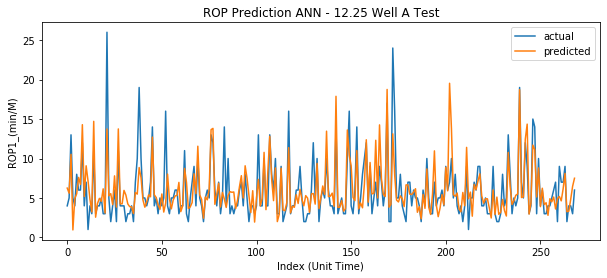

In [33]:
#Grafik perbandingan Prediksi dengan Aktual
plt.figure(figsize = (10,4))
line_chart1 = plt.plot(y_true)
line_chart2 = plt.plot(y_pred)
plt.title('ROP Prediction ANN - 12.25 Well A Test')
plt.xlabel('Index (Unit Time)')
plt.ylabel('ROP1_(min/M)')
plt.legend(['actual', 'predicted'], loc=1)
plt.show()

In [42]:
import math
from sklearn.metrics import r2_score

#MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(np.array(y_true), np.array(y_pred))

#RMSE
mse = sklearn.metrics.mean_squared_error(y_true, y_pred)
rmse = math.sqrt(mse)

#R2 SCORE
r2 = r2_score(y_true, y_pred)

print("MAPE: " + str(mape) + (' %'))
print("R2 SCORE: " + str(r2))
print("RMSE: " + str(rmse))

MAPE: 27.975793103082285 %
R2 SCORE: 0.7044177284862283
RMSE: 2.2136776269190293


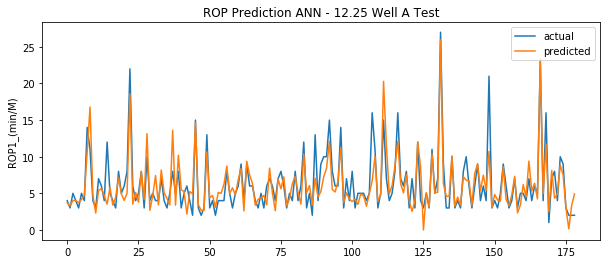

In [58]:
#Grafik perbandingan Prediksi dengan Aktual
plt.figure(figsize = (10,4))
line_chart1 = plt.plot(y_true)
line_chart2 = plt.plot(y_pred)
plt.title('ROP Prediction ANN - 12.25 Well A Test')
plt.xlabel('X: Data Testing')
plt.ylabel('ROP1_(min/M)')
plt.legend(['actual', 'predicted'], loc=1)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

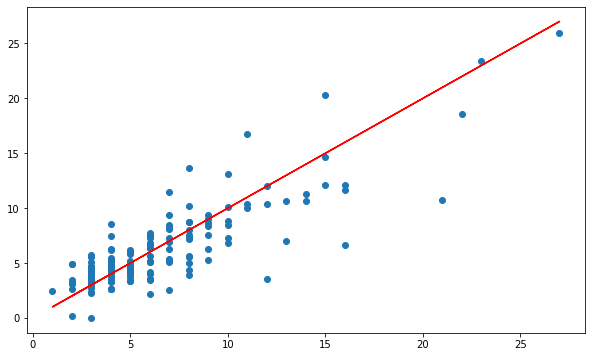

In [61]:
plt.figure(figsize = (10,6))
plt.scatter(y_true, y_pred)

# Line to Perfect predictions
plt.plot(y_true,y_true,'r')
plt.plot

In [67]:
#true value of TRAIN
pred_df1 = model.predict(X_train)
pred_df1 = pd.Series(pred_df1.reshape(716,))
actual_df1 = pd.DataFrame(y_train,columns=['Train Y'])
actual_df1 = pd.concat([actual_df1,pred_df1],axis=1)
actual_df1.columns = ['Train Y','Model Predictions_Train']
actual_df1

,Train Y,Model Predictions_Train
0,7,3.048722
1,11,8.505556
2,19,12.723017
3,6,5.522412
4,6,4.952369
...,...,...
711,3,3.978458
712,4,6.831610
713,6,4.866608
714,6,8.267462


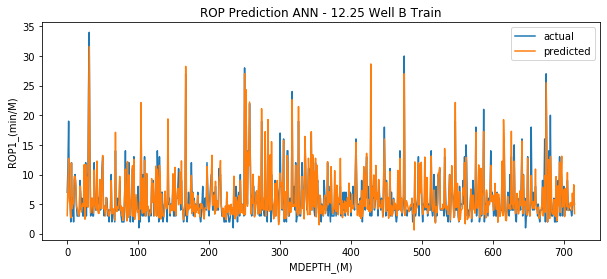

In [68]:
y_true1 = actual_df1['Train Y']
y_pred1 = actual_df1['Model Predictions_Train']

#Grafik perbandingan Prediksi dengan Aktual
plt.figure(figsize = (10,4))
line_chart1 = plt.plot(y_true1)
line_chart2 = plt.plot(y_pred1)
plt.title('ROP Prediction ANN - 12.25 Well B Train')
plt.xlabel('MDEPTH_(M)')
plt.ylabel('ROP1_(min/M)')
plt.legend(['actual', 'predicted'], loc=1)
plt.show()

In [69]:
pred_df_test = actual_df['Model Predictions_Test']
pred_df_train = actual_df1['Model Predictions_Train']

In [70]:
ann_pred = pred_df_train.append(pred_df_test)
ann_pred = pd.DataFrame(ann_pred)
ann_pred.columns = ['rop_pred']

In [71]:
df_train_new = df_nor.reset_index()
ann_pred_new = ann_pred.reset_index()

In [72]:
df_output = pd.concat([df_train_new, ann_pred_new], axis=1)
df_output = df_output.drop(['index'],axis = 1)
df_output

,TYPE_WELL,BIT_SIZE,MDEPTH_(M),MTVD_(M),WOB_(Ton),HKLD_(Ton),RPM,SCFM,MFI_(GPM),SPP_(Psi),MWI__(sg),ROP1_(min/M),rop_pred
0,1,12.25,1299,1124,7,55,40,0,773,1152,1,15,3.048722
1,1,12.25,1300,1125,8,54,55,0,768,1152,1,12,8.505556
2,1,12.25,1301,1125,7,55,55,0,750,1168,1,16,12.723017
3,1,12.25,1302,1126,6,60,60,0,805,1409,1,8,5.522412
4,1,12.25,1303,1127,8,58,60,0,780,1199,1,9,4.952369
...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,1,12.25,2196,1802,10,79,60,1000,610,1429,1,4,3.589499
891,1,12.25,2197,1803,12,77,61,1000,687,1635,1,5,2.542290
892,1,12.25,2198,1804,13,76,59,1000,692,1635,1,7,4.149867
893,1,12.25,2199,1805,8,81,60,1000,748,1545,1,8,13.304036


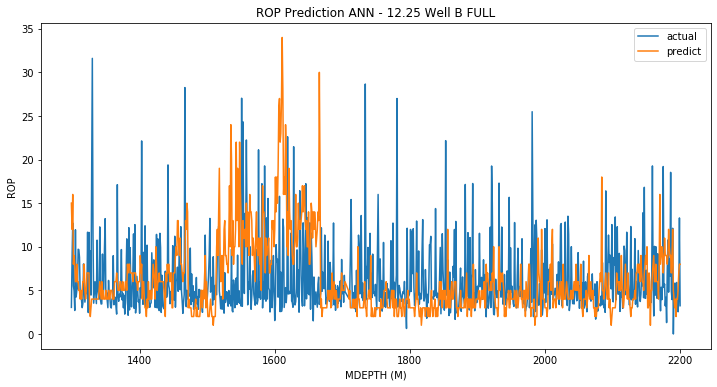

In [78]:
plt.figure(figsize = (12,6))

# line 1 points
x1 = df_output['MDEPTH_(M)']
y1 = df_output['rop_pred']
# plotting the line 1 points 
plt.plot(x1, y1, label = "actual")
  
# line 2 points
x2 = df_output['MDEPTH_(M)']
y2 = df_output['ROP1_(min/M)']
# plotting the line 2 points 
plt.plot(x2, y2, label = "predict")
  
# naming the x axis
plt.xlabel('MDEPTH (M)')
# naming the y axis
plt.ylabel('ROP')
# giving a title to my graph
plt.title('ROP Prediction ANN - 12.25 Well B FULL')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

### Save CSV

In [38]:
actual_df['Model Predictions_Test'] = actual_df['Model Predictions_Test'].astype('int64')
actual_df1['Model Predictions_Train'] = actual_df1['Model Predictions_Train'].astype('int64')

In [39]:
os.chdir('C:/Users/Anisa Gemelia/Documents/Dokumen Kuliah/Tugas Akhir/Output')

In [42]:
df_output.columns

Index(['TYPE_WELL', 'BIT_SIZE', 'MDEPTH_(M)', 'MTVD_(M)', 'WOB_(Ton)',
       'HKLD_(Ton)', 'RPM', 'SCFM', 'MFI_(GPM)', 'SPP_(Psi)', 'MWI__(sg)',
       'ROP1_(min/M)', 'rop_pred'],
      dtype='object')

In [43]:
#save ke csv
df_output.to_csv('prediksi_rop_ann_1225wella.csv', header = ['TYPE_WELL', 'BIT_SIZE', 'MDEPTH_(M)', 'MTVD_(M)', 'WOB_(Ton)',
       'HKLD_(Ton)', 'RPM', 'SCFM', 'MFI_(GPM)', 'SPP_(Psi)', 'MWI__(sg)',
       'ROP1_(min/M)', 'rop_pred'], index = False)

In [56]:
#save ke csv
actual_df.to_csv('prediksi_rop_ann_1225wella_test.csv', header = ['Test Y','Model Predictions_Test'], index = False)
actual_df1.to_csv('prediksi_rop_ann_1225wella_train.csv', header = ['Train Y','Model Predictions_Test'], index = False)